# Fashion MNIST deep learning classification problem with CNN

In [6]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import types
import pandas as pd
from tensorflow.keras.models import load_model

Reading in data

In [7]:
fashion = pd.read_csv("/content/fashion-mnist_train.csv")
labels = pd.read_csv("/content/label_names.csv")
fashion.join(labels, on="label")["Description"].value_counts()
fashion.join(labels, on="label")["Description"].value_counts()

Trouser        6000
Shirt          6000
Bag            6000
Coat           6000
T-shirt/top    6000
Sneaker        6000
Ankle boot     6000
Dress          6000
Sandal         6000
Pullover       6000
Name: Description, dtype: int64

In [8]:
# target variable
y = fashion.iloc[:, 0]
y.head()
# code target variable (y) to categorical
y_cat = to_categorical(y, num_classes=10)
y_cat.shape

(60000, 10)

Transforming data

In [9]:
X_train = np.array(fashion.iloc[:, 1:]).reshape(
    fashion.shape[0], 28, 28, 1).astype('float32')
print('Training data shape', X_train.shape)
# Training data shape(60000, 28, 28, 1)

# normalize the data (min_max)
X_train = X_train / 255

Training data shape (60000, 28, 28, 1)


Creating CNN model

In [10]:
 #initilaize and compile model

model = Sequential()

# Add a 2D convolution layer with 64 units to the model
model.add(Conv2D(filters=64, kernel_size=2, padding='same',
                 activation='relu', input_shape=(28, 28, 1)))
# Add a max pooling operation for spatial data
model.add(MaxPooling2D(pool_size=2))

# add 2 more 2D convolutional networks, with 32 layers
# after add pooling
for i in range(2):
    model.add(Conv2D(
        filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# flatten layers to pass to Dense layer
model.add(tf.keras.layers.Flatten())

# add 2 dense layers with 150 units
for i in range(2):
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.2))

# Add a softmax layer with 10 output units:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

In [11]:
# Feed input data and label data into the model and save it
history = model.fit(X_train,
                    y_cat,
                    validation_split=0.30,
                    epochs=250,
                    batch_size=500)

Epoch 1/250
84/84 [==============================] - 39s 463ms/step - loss: 1.1942 - accuracy: 0.5594 - val_loss: 0.6024 - val_accuracy: 0.7626
Epoch 2/250
84/84 [==============================] - 39s 462ms/step - loss: 0.5968 - accuracy: 0.7716 - val_loss: 0.4900 - val_accuracy: 0.8154
Epoch 3/250
84/84 [==============================] - 39s 462ms/step - loss: 0.4864 - accuracy: 0.8200 - val_loss: 0.4295 - val_accuracy: 0.8422
Epoch 4/250
84/84 [==============================] - 39s 463ms/step - loss: 0.4294 - accuracy: 0.8418 - val_loss: 0.3738 - val_accuracy: 0.8656
Epoch 5/250
84/84 [==============================] - 39s 464ms/step - loss: 0.3905 - accuracy: 0.8576 - val_loss: 0.3502 - val_accuracy: 0.8731
Epoch 6/250
84/84 [==============================] - 39s 470ms/step - loss: 0.3638 - accuracy: 0.8669 - val_loss: 0.3519 - val_accuracy: 0.8719
Epoch 7/250
84/84 [==============================] - 39s 463ms/step - loss: 0.3468 - accuracy: 0.8728 - val_loss: 0.3200 - val_accuracy:

Accuracy and Loss plot

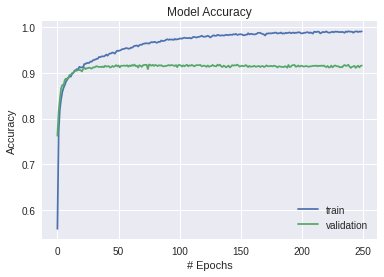

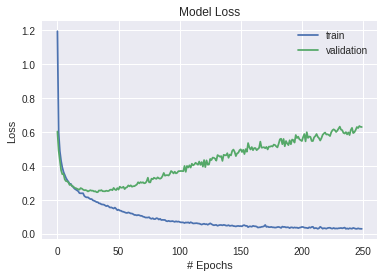

In [30]:
epoch = len(history.history.get('loss',[]))

# Plot Accuracy
plt.figure(2,figsize=(6,4))
plt.plot(range(epoch),history.history['accuracy'])
plt.plot(range(epoch),history.history['val_accuracy'])
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['train','validation'],loc=4)
plt.style.use(['seaborn'])

# Plot Loss
plt.figure(1,figsize=(6,4))
plt.plot(range(epoch),history.history['loss'])
plt.plot(range(epoch),history.history['val_loss'])
plt.xlabel('# Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['train','validation'])
plt.style.use(['seaborn'])
plt.savefig("Accuracy_loss.png")

In [ ]:
#save model
import torch
from torchvision import datasets, models, transforms
from google.colab import drive
drive.mount('/content/gdrive')
model_save_name = 'fashion_mnist.pt'
path = F"/content/gdrive/MyDrive/{model_save_name}" 
torch.save(model.state_dict(), path)
#my file id =4/1AY0e-g4jJl5-qa3bSPCLbgsRYgSgHAULkm_qbLOac4JpuZdPcALw_2Lj8sI

In [22]:
model.save(path,"fashion-mnist.h5")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/fashion_mnist.pt/assets


In [97]:
model.save("fashion_minst_conv.h5")

In [32]:
model.evaluate(X_train,y_cat)

1875/1875 [==============================] - 20s 11ms/step - loss: 0.1927 - accuracy: 0.9739


[0.19270052015781403, 0.9739333391189575]

### Predict on **test data** 



Prepare test data

In [33]:
fashion_test=pd.read_csv("/content/fashion-mnist_test.csv")
X_test=fashion_test.iloc[:,1:]
y_test=fashion_test.iloc[:,0]

In [36]:
# Convert data points from pixels to weighted values
X_test = np.array(X_test).reshape(X_test.shape[0],28, 28, 1).astype( 'float32' )
X_test = X_test/ 255.0

# Save the actual label of the test data - we can call it 'correct answer'
y_test_cat=  to_categorical(y_test, num_classes=10)

Predict results

In [38]:
# Predict the labels for the unseen test data
predictions = model.predict(X_test)

In [39]:
predictions[0]

array([1.0000000e+00, 5.9279168e-26, 4.1170185e-18, 4.5100337e-25,
       1.8725305e-19, 3.2091662e-24, 1.5050345e-18, 1.0950281e-27,
       7.9102295e-16, 1.8967526e-25], dtype=float32)

In [43]:
pred_label = [np.argmax(i) for i in predictions]
pred_label[:5]

[0, 1, 2, 6, 4]

In [145]:

correctly_classified = []
incorrectly_classified = []
index = 0
for actual, predict in zip(y_test, pred_label):
    if actual == predict:
        correctly_classified.append(index)
    else:
        incorrectly_classified.append(index)
    index += 1

ccc = len(correctly_classified)
icc = len(incorrectly_classified)
print('Correctly classified clothing items  : {:5d} ({:=5.2f} %)'.format(ccc, ccc * 100 / (ccc + icc)))    
print('Incorrectly classified clothing items: {:5d} ({:=5.2f} %)'.format(icc, icc * 100 / (ccc + icc)))  
incorrectly_classified[:5]

Correctly classified clothing items  :  9167 (91.67 %)
Incorrectly classified clothing items:   833 ( 8.33 %)


[3, 4, 5, 11, 38]

Confusion matrix

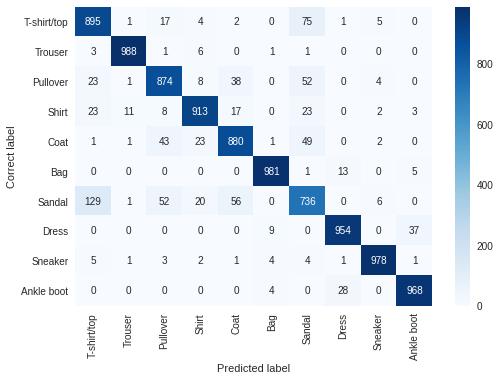

<Figure size 576x396 with 0 Axes>

In [98]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

label_names=pd.merge(pd.DataFrame(pred_label, columns=["Labels_pred"]), labels, how='left', left_on=['Labels_pred'], right_on=['Label']).drop("Label", axis=1)
conf_matrix = confusion_matrix(y_test, label_names.iloc[:,0])

# display confusion matrix as heatmap
ax = sns.heatmap(conf_matrix, 
            cmap='Blues', 
            xticklabels=label_names.iloc[:,1].unique(), 
            yticklabels=label_names.iloc[:,1].unique(),
            annot=True,
            fmt='d')

plt.xlabel('Predicted label') 
plt.ylabel('Correct label') 

plt.show()
plt.savefig("Confusion_matrix.png")

Precision per category

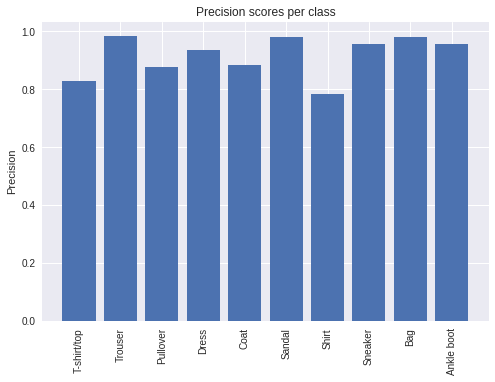

<Figure size 576x396 with 0 Axes>

In [137]:
from sklearn.metrics import precision_score, recall_score
precision=precision_score(y_test, label_names.iloc[:,0], average=None)

y_pos = np.arange(len(precision))

plt.bar(y_pos, precision, align='center')
plt.xticks(y_pos, labels.iloc[:,1], rotation=90)
plt.ylabel('Precision')
plt.title('Precision scores per class')

plt.show()
plt.savefig("Precision per category.png")

Recall per Category

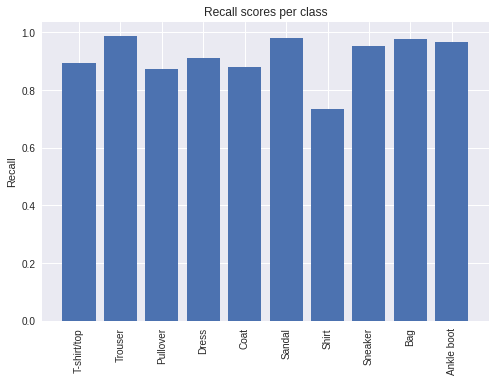

<Figure size 576x396 with 0 Axes>

In [138]:
#recall per category

recall_score=recall_score(y_test, label_names.iloc[:,0], average=None)

y_pos = np.arange(len(recall_score))

plt.bar(y_pos, recall_score, align='center')
plt.xticks(y_pos, labels.iloc[:,1], rotation=90)
plt.ylabel('Recall')
plt.title('Recall scores per class')

plt.show()
plt.savefig("Recall per category.png")

Wrong predictions

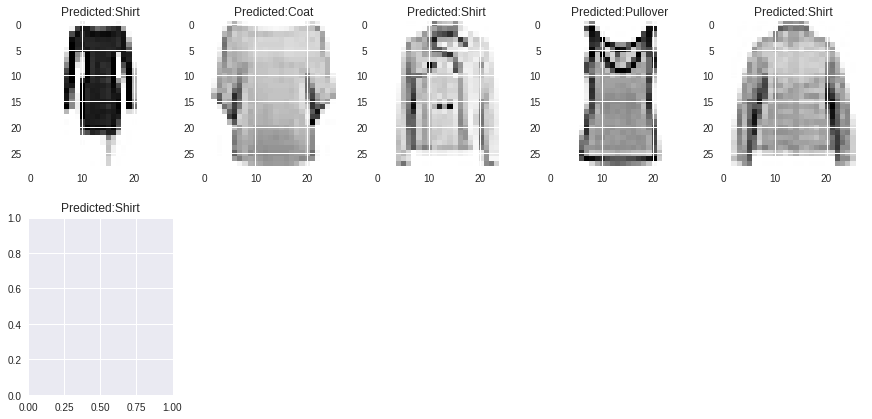

In [158]:
###What have we not predicted correct
plt.figure(figsize=(15,15))
i=0
for idx in incorrectly_classified[:6]:
   plt.imshow(X_test[idx].reshape(28,28,))
   plt.subplot(4,5,i+1)
   plt.title(f"Predicted:{label_names['Description'][idx]}")
   i+=1

plt.savefig("Wrong_predictions.png")

### Adding early stopping and increase neurons in both CONV2d and Dense

In [102]:
 #initilaize and compile model

model2 = Sequential()

# Add a 2D convolution layer with 64 units to the model
model2.add(Conv2D(filters=64, kernel_size=2, padding='same',
                 activation='relu', input_shape=(28, 28, 1)))
# Add a max pooling operation for spatial data
model2.add(MaxPooling2D(pool_size=2))

# add 2 more 2D convolutional networks, with 32 layers
# after add pooling
for i in range(3):
    model2.add(Conv2D(
        filters=32, kernel_size=2, padding='same', activation='relu'))
    model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# flatten layers to pass to Dense layer
model2.add(tf.keras.layers.Flatten())

# add 2 dense layers with 150 units
for i in range(2):
    model2.add(Dense(500, activation='relu'))
    model2.add(Dropout(0.2))

# Add a softmax layer with 10 output units:
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

model2.summary()

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 32)          4128      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 32)         

In [103]:
# Feed input data and label data into the model and save it
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model2.fit(X_train,
                    y_cat,
                    validation_split=0.30,
                    epochs=250,
                    batch_size=500, callbacks=[callback])

Epoch 1/250
84/84 [==============================] - 42s 502ms/step - loss: 1.1683 - accuracy: 0.5615 - val_loss: 0.6878 - val_accuracy: 0.7281
Epoch 2/250
84/84 [==============================] - 43s 517ms/step - loss: 0.6499 - accuracy: 0.7433 - val_loss: 0.5914 - val_accuracy: 0.7689
Epoch 3/250
84/84 [==============================] - 42s 504ms/step - loss: 0.5607 - accuracy: 0.7811 - val_loss: 0.5285 - val_accuracy: 0.7946
Epoch 4/250
84/84 [==============================] - 42s 506ms/step - loss: 0.4979 - accuracy: 0.8108 - val_loss: 0.4675 - val_accuracy: 0.8258
Epoch 5/250
84/84 [==============================] - 42s 506ms/step - loss: 0.4578 - accuracy: 0.8293 - val_loss: 0.4379 - val_accuracy: 0.8378
Epoch 6/250
84/84 [==============================] - 42s 506ms/step - loss: 0.4227 - accuracy: 0.8443 - val_loss: 0.4134 - val_accuracy: 0.8468
Epoch 7/250
84/84 [==============================] - 43s 506ms/step - loss: 0.4015 - accuracy: 0.8535 - val_loss: 0.3863 - val_accuracy:

In [105]:
model2.evaluate(X_train,y_cat)

1875/1875 [==============================] - 22s 12ms/step - loss: 0.2154 - accuracy: 0.9219


[0.21535587310791016, 0.9218500256538391]